## Team member and Contributions
> Shu Xu (shuxu3@illinois.edu)

> Yan Han (yanhan4@illinois.edu)

> Amrit Kumar(amritk2@illinois.edu)

**We finish this notebook together.**

## Introduction
In this assignment, you will be implementing a linear Support Vector Machine (SVM) classifier from scratch using stochastic gradient descent (SGD).

As we discussed in class, traditional SVMs often solve the dual problem, which involves a quadratic objective function subject to linear constraints. While this approach can be efficient for small-scale tasks, it becomes less practical for large-scale problems. In such cases, we can leverage the benefits of SGD to directly solve the primal problem.

## The SGD Algorithm
The SGD algorithm works as follows:

1. Start by choosing a random initial value of parameters
2. Loop Over Epochs:
    - In each epoch, go through the entire dataset once. An epoch is a complete pass through all the training data.
3. Loop Over Data Points:
    - Within each epoch, iterate over each data point in your training dataset.
4. Update the Gradient:
    - For each data point, calculate the gradient of the loss function with respect to the current parameter values. This gradient represents the direction of steepest ascent.
5. Calculate Step Sizes:
    - For each parameter, calculate the step size as : step size = gradient * learning rate.
6. Update Parameters:
    - Update new parameters as : new params = old params - step size
7. Repeat Until Convergence:
    - Repeat steps 3 to 6 for each data point in the dataset. Continue this process for a fixed number of epochs or until convergence criteria are met.


## Pegasos Algorithm
The Pegasos (Primal Estimated sub-GrAdient SOlver for SVM) algorithm, proposed by Shalev-Shwartz et al. (2011) [Paper Link](https://home.ttic.edu/~nati/Publications/PegasosMPB.pdf), is an application of SGD.

Recall that the primal problem of linear SVM can be expressed as the following the Loss + Penalty format:
$$
 \frac{\lambda}{2} \|\beta\|^2 + \frac{1}{n} \sum_{1}^{n}\left[ 1 - y_{i}\left( x_{i}^{t}\beta + \alpha \right) \right]_{+}
$$

where $\alpha$ is the intercept and $\beta$ is the p-dimensional coefficient vector

The **Pegasos Algorithm** can be summarized as follows:
1. initialize $\beta = 0_{p \times 1}$, $\alpha_1 = 0$, and $t = 0$
2. For *epoch = 1, 2, ..., T* do
    for *i = 1, 2, ..., n* do 
    - $t = t + 1, \eta_t = \frac{1}{t \lambda}$
    - update $\beta_{t+1} \Leftarrow \beta_t - \eta_t \Delta_t$
    - update $\alpha_{t+1} \Leftarrow \alpha_t - \eta_t \delta_t$
Here $\eta_t$ is the learning rate, and $\Delta_t$ and $\delta_t$ are the (sub)grdient of $J_i\left(\beta, \alpha \right)$, where $\beta=\beta_t$, and $\alpha = \alpha_t$:
$$
    J_i\left( \beta, \alpha \right) = \frac{\lambda}{2} \|\beta\|^2 + \left[ 1 - y_i\left( x_{i}^{t}\beta + \alpha \right) \right]_{+}
$$

$$
    \Delta_t = 
    \begin{cases}
    \lambda \beta_t - y_i x_i &  if \space y_i\left( x_{i}^{t}\beta_t + \alpha_t\right) < 1\\
    \beta_t & otherwise \\
    \end{cases}
$$

$$
    \delta_t =
    \begin{cases}
    -y_i  &  if \space y_i\left( x_{i}^{t}\beta_t + \alpha_t\right) < 1\\
    0 & otherwise
    \end{cases}
$$


### Implement the **Pegasos Algorithm**


- Use a fixed number of epochs, e.g., T = 20.
- In each epoch, before going through the dataset, consider randomizing the order of the data points. To achieve this, you should set random seeds for 
shuffling. For this assignment, the seeds used for shuffling do not need to be associated with your UIN.

- Test your code with the provided training (200 samples) and test (600 samples) datasets, which are subsets of the MNIST data. Each dataset consists of 257 columns, with the first 256 columns representing the features, and the last column indicating the label (either 5 or 6).
    - [coding5_train.csv](https://liangfgithub.github.io/Data/coding5_train.csv)
    - [coding5_test.csv](https://liangfgithub.github.io/Data/coding5_test.csv)

- Report **confusion tables** on the **training and test** datasets.

- Your code should obtain **less than 15%** test error.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [2]:
training_data = pd.read_csv("coding5_train.csv")
test_data = pd.read_csv("coding5_test.csv")

In [3]:
training_X = training_data.drop(columns=["Y"])
training_Y = training_data["Y"]
training_transformed_Y = training_Y.transform(lambda x: -1 if x==5 else 1)
test_X = test_data.drop(columns=["Y"])
test_Y = test_data["Y"]
test_transformed_Y = test_Y.transform(lambda x: -1 if x==5 else 1)

In [4]:
n_features = len(training_X.columns)
n_training_samples = len(training_X)
n_test_samples = len(test_X)

In [5]:
T = 20 # number of epochs
beta = np.zeros(n_features) # p-diemnsional coefficient vector
alpha = 0.0    # intercept
Lambda = 1
t = 0
training_index = np.linspace(0, n_training_samples - 1, n_training_samples).astype(int)

In [6]:
for epoch in range(1, T+1):
    np.random.seed(epoch)
    np.random.shuffle(training_index)
    for i in training_index:
        X_i, y_i = training_X.values[i, :], training_transformed_Y.values[i]
        t += 1
        eta_t = 1.0/(t * Lambda)

        X_i_pred = np.dot(X_i, beta) + alpha
        if y_i * X_i_pred < 1.0:
            beta = beta - eta_t *(Lambda * beta - y_i * X_i)
            alpha = alpha - eta_t * (-y_i)
        else:
            beta = beta - eta_t * Lambda * beta
            alpha = alpha - eta_t * 0        
    # update prediction
    training_Y_pred = np.dot(training_X.values, beta) + alpha

    # compute loss function
    loss = 0.5 * Lambda * np.linalg.norm(beta)**2 + np.mean(np.maximum(np.zeros(n_training_samples), 1.0 - training_transformed_Y.values * training_Y_pred))

    print(f"Loss = {loss}, at Epoch = {epoch}")


Loss = 0.29691440039779327, at Epoch = 1
Loss = 0.1930513274043954, at Epoch = 2
Loss = 0.17691578206529102, at Epoch = 3
Loss = 0.17777763497349575, at Epoch = 4
Loss = 0.17303216891257217, at Epoch = 5
Loss = 0.1726069992941309, at Epoch = 6
Loss = 0.17055827989226086, at Epoch = 7
Loss = 0.18567281318770423, at Epoch = 8
Loss = 0.1691450624247846, at Epoch = 9
Loss = 0.16738464614923287, at Epoch = 10
Loss = 0.17379247357570896, at Epoch = 11
Loss = 0.1736366010771614, at Epoch = 12
Loss = 0.16755560429731275, at Epoch = 13
Loss = 0.16625283092695003, at Epoch = 14
Loss = 0.16637293217636115, at Epoch = 15
Loss = 0.16821559901238772, at Epoch = 16
Loss = 0.16639253466722592, at Epoch = 17
Loss = 0.16608320492752968, at Epoch = 18
Loss = 0.1656589297631928, at Epoch = 19
Loss = 0.16624192027720747, at Epoch = 20


### Calculate confusion matrices

In [7]:
## Training data
y_train_raw_prediction = np.dot(training_X.values, beta) + alpha
y_train_prediction = np.zeros(n_training_samples)
for i in range(n_training_samples):
    if y_train_raw_prediction[i] < 0:
        y_train_prediction[i] = -1
    else:
        y_train_prediction[i] = 1

In [8]:
## Test data
y_test_raw_prediction = np.dot(test_X.values, beta) + alpha
y_test_prediction = np.zeros(n_test_samples)
for i in range(n_test_samples):
    if y_test_raw_prediction[i] < 0:
        y_test_prediction[i] = -1
    else:
        y_test_prediction[i] = 1

Training data error rate:  0.01
Confusion matrix:


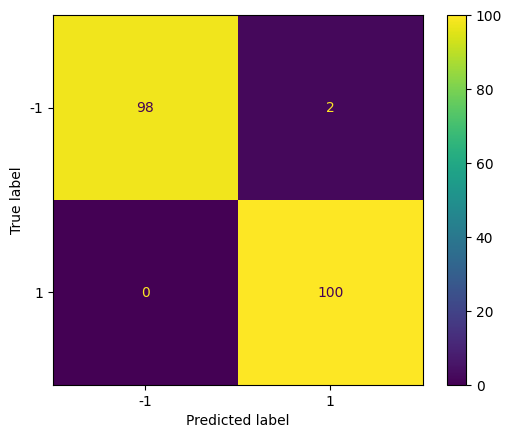

In [9]:
print("Training data error rate: ", np.sum(y_train_prediction != training_transformed_Y) / n_training_samples)
print("Confusion matrix:")
ConfusionMatrixDisplay.from_predictions(training_transformed_Y, y_train_prediction)
plt.show()

Test data error rate:  0.03666666666666667
Confusion matrix:


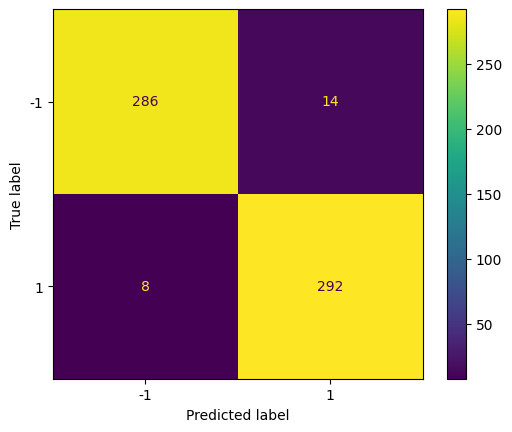

In [10]:
print("Test data error rate: ", np.sum(y_test_prediction != test_transformed_Y) / n_test_samples)
print("Confusion matrix:")
ConfusionMatrixDisplay.from_predictions(test_transformed_Y, y_test_prediction)
plt.show()